In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import cv2
import seaborn as sns
import os
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from subprocess import check_output
print(check_output(["ls", "/data/kaggle/train"]).decode("utf8"))

Type_1
Type_2
Type_3



In [2]:
abspath_dataset_dir_train_1 = '/data/kaggle/train/Type_1'
abspath_dataset_dir_train_2 = '/data/kaggle/train/Type_2'
abspath_dataset_dir_train_3 = '/data/kaggle/train/Type_3'
abspath_dataset_dir_test    = '/data/kaggle/test/'
abspath_dataset_dir_add_1   = '/data/kaggle/additional/Type_1'
abspath_dataset_dir_add_2   = '/data/kaggle/additional/Type_2'
abspath_dataset_dir_add_3   = '/data/kaggle/additional/Type_3'

def get_list_abspath_img(abspath_dataset_dir):
    list_abspath_img = []
    for str_name_file_or_dir in os.listdir(abspath_dataset_dir):
        if ('.jpg' in str_name_file_or_dir) == True:
            list_abspath_img.append(os.path.join(abspath_dataset_dir, str_name_file_or_dir))
    list_abspath_img.sort()
    return list_abspath_img


list_abspath_img_train_1 = get_list_abspath_img(abspath_dataset_dir_train_1)
list_abspath_img_train_2 = get_list_abspath_img(abspath_dataset_dir_train_2)
list_abspath_img_train_3 = get_list_abspath_img(abspath_dataset_dir_train_3)
list_abspath_img_train   = list_abspath_img_train_1 + list_abspath_img_train_2 + list_abspath_img_train_3

list_abspath_img_test    = get_list_abspath_img(abspath_dataset_dir_test)

list_abspath_img_add_1   = get_list_abspath_img(abspath_dataset_dir_add_1)
list_abspath_img_add_2   = get_list_abspath_img(abspath_dataset_dir_add_2)
list_abspath_img_add_3   = get_list_abspath_img(abspath_dataset_dir_add_3)
list_abspath_img_add     = list_abspath_img_add_1   + list_abspath_img_add_2   + list_abspath_img_add_3

# 0: Type_1, 1: Type_2, 2: Type_3
list_answer_train        = [0] * len(list_abspath_img_train_1) + [1] * len(list_abspath_img_train_2) + [2] * len(list_abspath_img_train_3)
list_answer_add          = [0] * len(list_abspath_img_add_1) + [1] * len(list_abspath_img_add_2) + [2] * len(list_abspath_img_add_3)

In [3]:
print(list_abspath_img_train_1[0:2])
print(list_abspath_img_train_2[0:2])
print(list_abspath_img_train_3[0:2])
print(list_abspath_img_train[0:4])
print(list_abspath_img_test[0:3])
print(list_abspath_img_add_1[0:2])
print(list_abspath_img_add_2[0:2])
print(list_abspath_img_add_3[0:2])
print(list_abspath_img_add[0:4])

['/data/kaggle/train/Type_1/0.jpg', '/data/kaggle/train/Type_1/10.jpg']
['/data/kaggle/train/Type_2/1.jpg', '/data/kaggle/train/Type_2/100.jpg']
['/data/kaggle/train/Type_3/1000.jpg', '/data/kaggle/train/Type_3/1003.jpg']
['/data/kaggle/train/Type_1/0.jpg', '/data/kaggle/train/Type_1/10.jpg', '/data/kaggle/train/Type_1/1013.jpg', '/data/kaggle/train/Type_1/1014.jpg']
['/data/kaggle/test/0.jpg', '/data/kaggle/test/1.jpg', '/data/kaggle/test/10.jpg']
['/data/kaggle/additional/Type_1/1000.jpg', '/data/kaggle/additional/Type_1/1003.jpg']
['/data/kaggle/additional/Type_2/0.jpg', '/data/kaggle/additional/Type_2/1.jpg']
['/data/kaggle/additional/Type_3/100.jpg', '/data/kaggle/additional/Type_3/1002.jpg']
['/data/kaggle/additional/Type_1/1000.jpg', '/data/kaggle/additional/Type_1/1003.jpg', '/data/kaggle/additional/Type_1/1009.jpg', '/data/kaggle/additional/Type_1/101.jpg']


In [4]:
from glob import glob
basepath = '/data/kaggle/train/'

all_cervix_images = []

for path in sorted(glob(basepath + "*")):
    #print(path)
    cervix_type = path.split("/")[-1]
    #print(cervix_type)
    cervix_images = sorted(glob(basepath + cervix_type + "/*"))
    #print(cervix_images)
    all_cervix_images = all_cervix_images + cervix_images

all_cervix_images = pd.DataFrame({'imagepath': all_cervix_images})
all_cervix_images['filetype'] = all_cervix_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
all_cervix_images['type'] = all_cervix_images.apply(lambda row: row.imagepath.split("/")[-2], axis=1)
all_cervix_images.head()

,imagepath,filetype,type
0,/data/kaggle/train/Type_1/0.jpg,jpg,Type_1
1,/data/kaggle/train/Type_1/10.jpg,jpg,Type_1
2,/data/kaggle/train/Type_1/1013.jpg,jpg,Type_1
3,/data/kaggle/train/Type_1/1014.jpg,jpg,Type_1
4,/data/kaggle/train/Type_1/1019.jpg,jpg,Type_1


We have a total of 1481 images in the whole dataset


/home/u3764/.conda/envs/test_env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



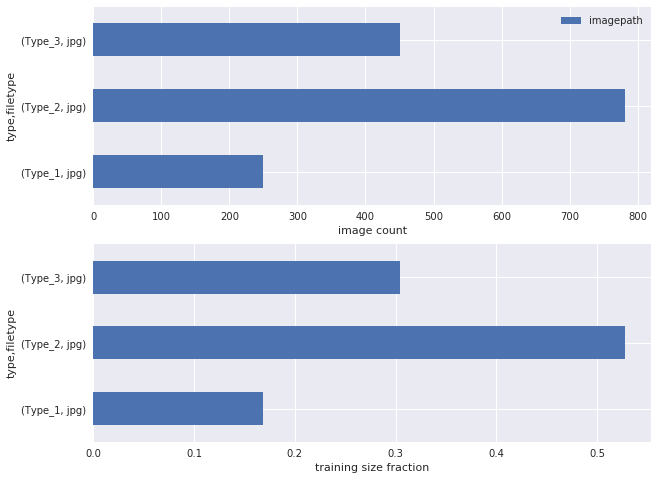

In [5]:
print('We have a total of {} images in the whole dataset'.format(all_cervix_images.shape[0]))
type_aggregation = all_cervix_images.groupby(['type', 'filetype']).agg('count')
type_aggregation_p = type_aggregation.apply(lambda row: 1.0 * row['imagepath']/all_cervix_images.shape[0], axis=1)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

type_aggregation.plot.barh(ax=axes[0])
axes[0].set_xlabel("image count")
type_aggregation_p.plot.barh(ax=axes[1])
axes[1].set_xlabel("training size fraction")

In [9]:
import cv2
import matplotlib.pyplot

def sub_func_load_img(abspath_img):
    img_rgb = cv2.cvtColor(cv2.imread(abspath_img), cv2.COLOR_BGR2RGB)
    return img_rgb

def show_img(abspath_img):
    matplotlib.pyplot.imshow(sub_func_load_img(abspath_img))
    matplotlib.pyplot.show()

In [8]:
all_cervix_images['type'].unique()

array(['Type_1', 'Type_2', 'Type_3'], dtype=object)

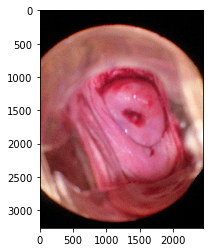

In [9]:
f = all_cervix_images[all_cervix_images['type'] == 'Type_1']['imagepath'].values[0]
show_img(f)

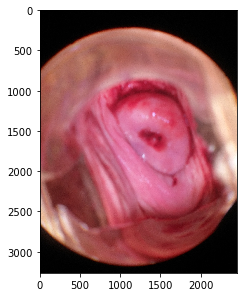

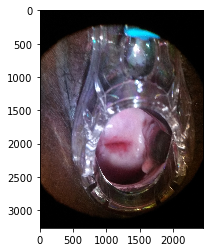

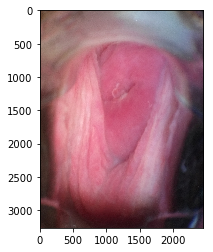

In [11]:
fig = plt.figure(figsize=(12,8))

i = 1
for t in all_cervix_images['type'].unique():
    try:
        ax = fig.add_subplot(1,3,i)
        i+=1
        f = all_cervix_images[all_cervix_images['type'] == t]['imagepath'].values[0]
        show_img(f)
    except:
        print("error")

In [5]:
imread(row.imagepath).shape

NameError: name 'row' is not defined

In [10]:
from collections import defaultdict

images = defaultdict(list)

for _, t in enumerate(all_cervix_images['type'].unique()):
    
    #print(_, t)
    sample_counter = 0
    path_type = all_cervix_images[all_cervix_images['type'] == t].reset_index(drop=True)
    
    for index, row in path_type.iterrows():
        
        print('reading image {}'.format(row.imagepath))
        try:
            #img = imread(row.imagepath)
            img = sub_func_load_img(row.imagepath)
            print(img.shape)
            sample_counter += 1
            images[t].append(img)
        except:
            print('image read failed for {}'.format(row.imagepath))
        
        if sample_counter > 3:
            break

reading image /data/kaggle/train/Type_1/0.jpg
(3264, 2448, 3)
reading image /data/kaggle/train/Type_1/10.jpg
(4128, 3096, 3)
reading image /data/kaggle/train/Type_1/1013.jpg
(3264, 2448, 3)
reading image /data/kaggle/train/Type_1/1014.jpg
(4128, 3096, 3)
reading image /data/kaggle/train/Type_2/1.jpg
(3264, 2448, 3)
reading image /data/kaggle/train/Type_2/100.jpg
(3264, 2448, 3)
reading image /data/kaggle/train/Type_2/1001.jpg
(4128, 3096, 3)
reading image /data/kaggle/train/Type_2/1002.jpg
(3264, 2448, 3)
reading image /data/kaggle/train/Type_3/1000.jpg
(3264, 2448, 3)
reading image /data/kaggle/train/Type_3/1003.jpg
(3264, 2448, 3)
reading image /data/kaggle/train/Type_3/1004.jpg
(3264, 2448, 3)
reading image /data/kaggle/train/Type_3/1007.jpg
(3264, 2448, 3)


In [11]:
dfs = []
for t in all_cervix_images['type'].unique():
    t_ = pd.DataFrame(
        {
            'nrows': list(map(lambda i: i.shape[0], images[t])),
            'ncols': list(map(lambda i: i.shape[1], images[t])),
            'nchans': list(map(lambda i: i.shape[2], images[t])),
            'type': t
        }
    )
    dfs.append(t_)

shapes_df = pd.concat(dfs, axis=0)
shapes_df_grouped = shapes_df.groupby(by=['nchans', 'ncols', 'nrows', 'type']).size().reset_index().sort_values(['type', 0], ascending=False)
shapes_df_grouped

,nchans,ncols,nrows,type,0
2,3,2448,3264,Type_3,4
1,3,2448,3264,Type_2,3
4,3,3096,4128,Type_2,1
0,3,2448,3264,Type_1,2
3,3,3096,4128,Type_1,2


/home/u3764/.conda/envs/test_env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



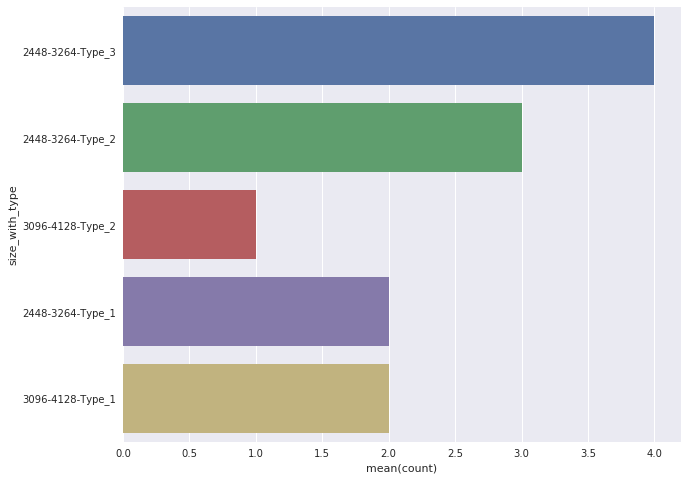

In [12]:
shapes_df_grouped['size_with_type'] = shapes_df_grouped.apply(lambda row: '{}-{}-{}'.format(row.ncols, row.nrows, row.type), axis=1)
shapes_df_grouped = shapes_df_grouped.set_index(shapes_df_grouped['size_with_type'].values)
shapes_df_grouped['count'] = shapes_df_grouped[[0]]

plt.figure(figsize=(10,8))
#shapes_df_grouped['count'].plot.barh(figsize=(10,8))
sns.barplot(x="count", y="size_with_type", data=shapes_df_grouped)

http://docs.opencv.org/3.1.0/de/d25/imgproc_color_conversions.html 

http://www.steinm.com/blog/greyscale-images-with-python-opencv/

http://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#normalize

http://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html

http://blog.csdn.net/ikerpeng/article/details/17239809

In [13]:
def transform_image(img, rescaled_dim, to_gray = False):
    
    resized = cv2.resize(img, (rescaled_dim, rescaled_dim), cv2.INTER_CUBIC)
    # 因為這邊每張的image的size都不一樣，我們必須把圖片設成想要的size，例如：3264*2448*3 = > 100*100*3

    if to_gray:
        resized = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY).astype('float') # RGB 轉灰階 => cv2.COLOR_RGB2GRAY
    else:
        resized = resized.astype('float')

    normalized = cv2.normalize(resized, None, 0.0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F) 
    # NORM_MINMAX => (a - min)/(max - min) * (beta-alpha) + alpha
    
    timg = normalized.reshape(1, np.prod(normalized.shape)) # np.prod => shape[0] * shape[1], reshape:拉平

    return timg/np.linalg.norm(timg) # np.linalg.norm : Frobenius norm 

/home/u3764/.conda/envs/test_env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



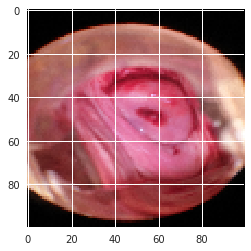

In [40]:
matplotlib.pyplot.imshow(cv2.resize(all_images[0], (rescaled_dim, rescaled_dim), cv2.INTER_LINEAR))

/home/u3764/.conda/envs/test_env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



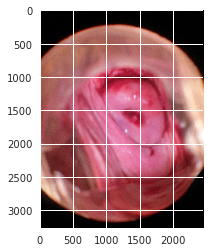

In [41]:
matplotlib.pyplot.imshow(all_images[0])

In [14]:
img_resized = cv2.resize(all_images[0], (rescaled_dim, rescaled_dim), cv2.INTER_LINEAR)

NameError: name 'all_images' is not defined

In [78]:
img_resized[40]

array([[156,  78,  73],
       [155,  80,  74],
       [155,  80,  74],
       [156,  78,  71],
       [162,  85,  77],
       [165,  88,  82],
       [172,  94,  91],
       [173,  95,  95],
       [175,  95,  98],
       [175,  96, 102],
       [176,  99, 107],
       [176, 103, 114],
       [172, 100, 112],
       [170,  98, 109],
       [182, 110, 121],
       [183, 116, 125],
       [184, 112, 124],
       [183, 102, 119],
       [181,  92, 112],
       [190,  91, 117],
       [195,  92, 119],
       [198,  93, 118],
       [187,  80, 103],
       [174,  60,  83],
       [170,  54,  75],
       [173,  56,  82],
       [165,  51,  77],
       [181,  72,  97],
       [199,  89, 118],
       [212, 115, 148],
       [215, 112, 144],
       [212,  90, 121],
       [225, 115, 150],
       [223, 111, 146],
       [221, 111, 146],
       [226, 120, 158],
       [222, 117, 157],
       [210,  82, 116],
       [204,  63,  98],
       [210,  89, 125],
       [221, 119, 158],
       [225, 119

In [87]:
img_normalized = cv2.normalize(img_resized, None, 0.0, 1.0, cv2.NORM_MINMAX, dtype = cv2.CV_32F)

In [92]:
img_t = img_normalized.reshape(1, np.prod(img_normalized.shape))

In [94]:
img_t/np.linalg.norm(img_t)

array([[  4.71753701e-05,   4.71753701e-05,   4.71753701e-05, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]], dtype=float32)

In [15]:
rescaled_dim = 100

all_images = []
all_image_types = []

for t in all_cervix_images['type'].unique():
    all_images = all_images + images[t]
    all_image_types = all_image_types + len(images[t])*[t]

# - normalize each uint8 image to the value interval [0, 1] as float image
# - rgb to gray
# - downsample image to rescaled_dim X rescaled_dim
# - L2 norm of each sample = 1

gray_all_images_as_vecs = [transform_image(img, rescaled_dim) for img in all_images]

In [16]:
np.array(gray_all_images_as_vecs).squeeze()

array([[  4.71753701e-05,   4.71753701e-05,   4.71753701e-05, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  8.94379860e-04,   8.94379860e-04,   7.89158687e-04, ...,
          1.57831737e-03,   1.68353843e-03,   2.78836070e-03],
       [  5.81449689e-03,   4.74924548e-03,   2.57435720e-03, ...,
          4.43854733e-05,   4.43854733e-05,   1.33156413e-04],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          5.06231154e-05,   5.06231154e-05,   5.06231154e-05],
       [  1.71896609e-04,   1.71896609e-04,   2.57844920e-04, ...,
          4.72715677e-04,   1.28922460e-04,   4.29741522e-05]], dtype=float32)

In [17]:
gray_imgs_mat = np.array(gray_all_images_as_vecs).squeeze()
all_image_types = np.array(all_image_types)
gray_imgs_mat.shape, all_image_types.shape

((12, 30000), (12,))

In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=500,
    verbose=2
).fit_transform(gray_imgs_mat)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 11 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 12 / 12
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Iteration 25: error = 1.0394799, gradient norm = 0.0000000
[t-SNE] Iteration 25: gradient norm 0.000000. Finished.
[t-SNE] Iteration 50: error = 1.0394799, gradient norm = 0.0000000
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.039480
[t-SNE] Iteration 75: error = 1.0394799, gradient norm = 0.0000000
[t-SNE] Iteration 75: gradient norm 0.000000. Finished.
[t-SNE] Error after 75 iterations: 1.039480


In [19]:
from sklearn import preprocessing

trace1 = go.Scatter3d(
    x=tsne[:,0],
    y=tsne[:,1],
    z=tsne[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = preprocessing.LabelEncoder().fit_transform(all_image_types),
        colorscale = 'Portland',
        colorbar = dict(title = 'cervix types'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.9
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3D embedding of images')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

/home/u3764/.conda/envs/test_env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



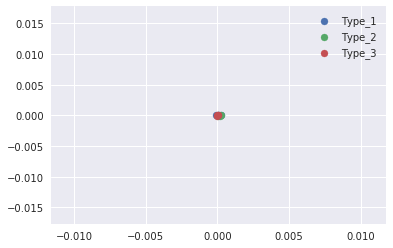

In [20]:
for t in all_cervix_images['type'].unique():
    tsne_t = tsne[np.where(all_image_types == t), :][0]
    plt.scatter(tsne_t[:, 0], tsne_t[:, 1])
plt.legend(all_cervix_images['type'].unique())

/home/u3764/.conda/envs/test_env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



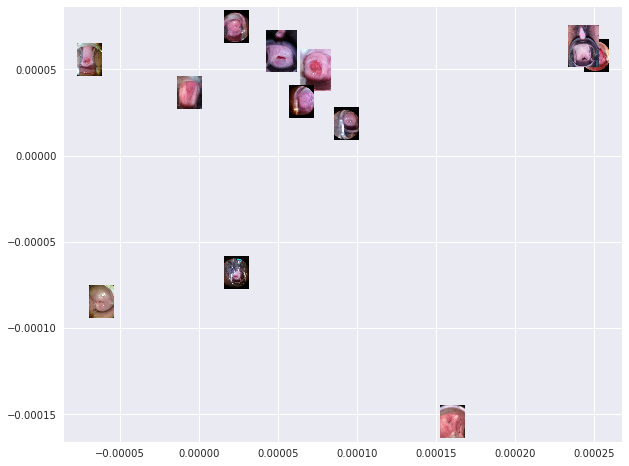

In [21]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def imscatter(x, y, images, ax=None, zoom=0.01):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    #return artists

nimgs = 60
plt.figure(figsize=(10,8))
imscatter(tsne[0:nimgs,0], tsne[0:nimgs,1], all_images[0:nimgs])

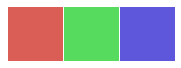

In [22]:
pal = sns.color_palette("hls", 3)
sns.palplot(pal)

/home/u3764/.conda/envs/test_env/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.

/home/u3764/.conda/envs/test_env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



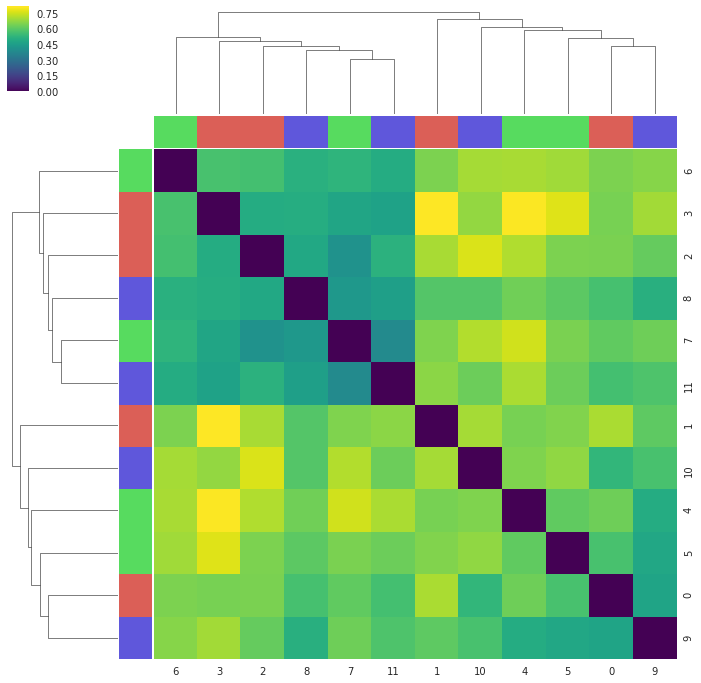

In [23]:
from scipy.spatial.distance import pdist, squareform

sq_dists = squareform(pdist(gray_imgs_mat))

all_image_types = list(all_image_types)

d = {
    'Type_1': pal[0],
    'Type_2': pal[1],
    'Type_3': pal[2]
}

# translate each sample to its color
colors = list(map(lambda t: d[t], all_image_types))

sns.clustermap(
    sq_dists,
    figsize=(12,12),
    row_colors=colors, col_colors=colors,
    cmap=plt.get_cmap('viridis')
)

/home/u3764/.conda/envs/test_env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



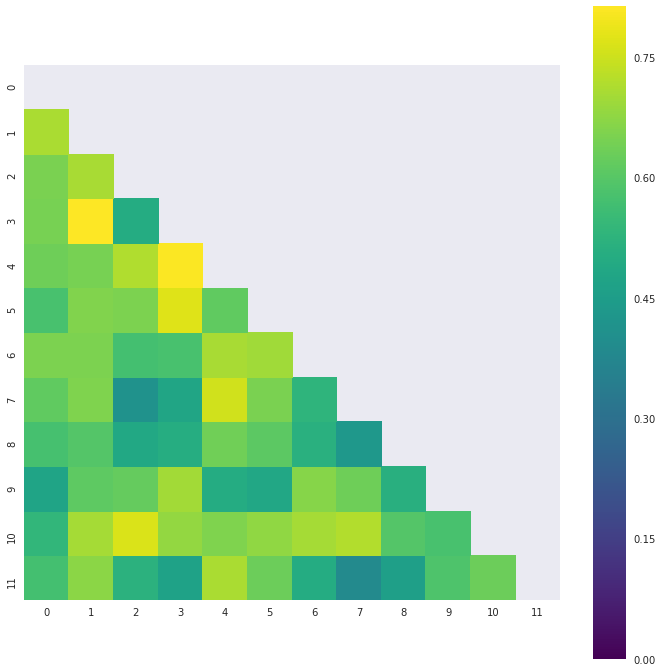

In [24]:
mask = np.zeros_like(sq_dists, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,12))
sns.heatmap(sq_dists, cmap=plt.get_cmap('viridis'), square=True, mask=mask)

/home/u3764/.conda/envs/test_env/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning:

Mean of empty slice

/home/u3764/.conda/envs/test_env/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning:

Mean of empty slice



/home/u3764/.conda/envs/test_env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



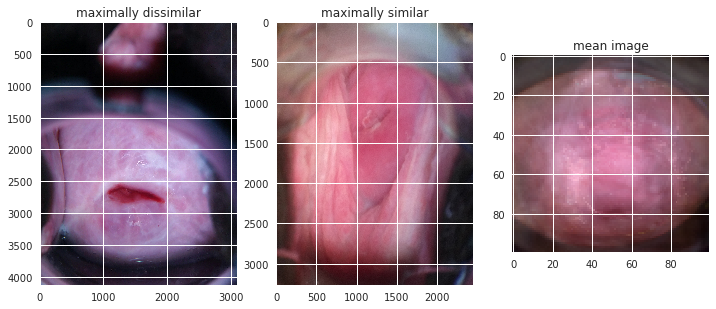

In [25]:
# upper triangle of matrix set to np.nan
sq_dists[np.triu_indices_from(mask)] = np.nan
sq_dists[0, 0] = np.nan

fig = plt.figure(figsize=(12,8))
# maximally dissimilar image
ax = fig.add_subplot(1,3,1)
maximally_dissimilar_image_idx = np.nanargmax(np.nanmean(sq_dists, axis=1))
plt.imshow(all_images[maximally_dissimilar_image_idx])
plt.title('maximally dissimilar')

# maximally similar image
ax = fig.add_subplot(1,3,2)
maximally_similar_image_idx = np.nanargmin(np.nanmean(sq_dists, axis=1))
plt.imshow(all_images[maximally_similar_image_idx])
plt.title('maximally similar')

# now compute the mean image
ax = fig.add_subplot(1,3,3)
mean_img = gray_imgs_mat.mean(axis=0).reshape(rescaled_dim, rescaled_dim, 3)
plt.imshow(cv2.normalize(mean_img, None, 0.0, 1.0, cv2.NORM_MINMAX))
plt.title('mean image')